In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
second = pd.read_excel('./data/delete_duplicated.xlsx')

## 우유군
- 2192 - 2231

- 우유군에 해당하는 식품군을 가져온다.

In [5]:
tmp_01 = second[2192:(2231 + 1)]

In [6]:
tmp_01.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2192,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
2193,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2194,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
2195,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
2196,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


In [7]:
tmp_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2192 to 2231
Data columns (total 14 columns):
번호            40 non-null int64
식품군           40 non-null object
식품이름          40 non-null object
1회제공량 (g)     40 non-null int64
열량 (kcal)     40 non-null float64
탄수화물 (g)      40 non-null float64
단백질 (g)       40 non-null float64
지방 (g)        40 non-null float64
당류 (g)        36 non-null float64
나트륨 (mg)      40 non-null float64
콜레스테롤 (mg)    38 non-null float64
포화지방산 (g)     38 non-null float64
트랜스지방산 (g)    40 non-null int64
년도            40 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 4.7+ KB


In [8]:
tmp_01.shape

(40, 14)

# 설정 파리미터

In [64]:
c = 10
p = 6
f = 7
f_l = 2

In [9]:
want_normal_kcal = 125
want_low_kcal = 80
error_rate = 0.1
# 지방 / 탄수화물
rate_normal = 7 / 10

plus_normal_rate = rate_normal + (rate_normal * error_rate)
print("일반 우유 양의 오차 = ", plus_normal_rate)
minus_normal_rate = rate_normal - (rate_normal * error_rate)
print("일반 우유 음의 오차 = ", minus_normal_rate)

rate_low = 2 / 10 
plus_low_rate = rate_low + (rate_low * error_rate)
print("저지방 양의 오차 = ", plus_low_rate)
minus_low_rate = rate_low - (rate_low * error_rate)
print("저지방 음의 오차 = ", minus_low_rate)

일반 우유 양의 오차 =  0.7699999999999999
일반 우유 음의 오차 =  0.63
저지방 양의 오차 =  0.22000000000000003
저지방 음의 오차 =  0.18


In [10]:
total = tmp_01
total_low = tmp_01

In [11]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2192,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
2193,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2194,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
2195,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
2196,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


In [12]:
total_low.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2192,4138,우유 및 유제품,모유,100,65.0,7.20,1.10,3.50,6.40,15.0,15.00,1.32,0,2017
2193,4140,우유 및 유제품,"분유, 1단계",100,524.0,56.88,12.41,25.75,49.01,164.0,50.95,11.35,0,2017
2194,4142,우유 및 유제품,"분유, 2단계",100,522.0,56.93,12.63,25.38,49.00,171.0,53.05,11.34,0,2017
2195,4144,우유 및 유제품,"분유, 3단계",100,491.0,56.04,16.91,20.65,43.85,185.0,61.33,9.35,0,2017
2196,4146,우유 및 유제품,"분유, 전지",100,514.0,39.07,25.46,27.32,38.63,322.0,83.80,18.02,0,2017


## index reset

In [13]:
total = total.reset_index()
total_low = total_low.reset_index()
del total['index']
del total_low['index']

print(total.head())
print(total_low.head())

     번호       식품군      식품이름  1회제공량 (g)  열량 (kcal)  탄수화물 (g)  단백질 (g)  지방 (g)  \
0  4138  우유 및 유제품       모유         100       65.0      7.20     1.10    3.50   
1  4140  우유 및 유제품  분유, 1단계         100      524.0     56.88    12.41   25.75   
2  4142  우유 및 유제품  분유, 2단계         100      522.0     56.93    12.63   25.38   
3  4144  우유 및 유제품  분유, 3단계         100      491.0     56.04    16.91   20.65   
4  4146  우유 및 유제품   분유, 전지         100      514.0     39.07    25.46   27.32   

   당류 (g)  나트륨 (mg)  콜레스테롤 (mg)  포화지방산 (g)  트랜스지방산 (g)    년도  
0    6.40      15.0       15.00       1.32           0  2017  
1   49.01     164.0       50.95      11.35           0  2017  
2   49.00     171.0       53.05      11.34           0  2017  
3   43.85     185.0       61.33       9.35           0  2017  
4   38.63     322.0       83.80      18.02           0  2017  
     번호       식품군      식품이름  1회제공량 (g)  열량 (kcal)  탄수화물 (g)  단백질 (g)  지방 (g)  \
0  4138  우유 및 유제품       모유         100       65.0      7.20  

### Nan 값을 0.0 으로 채워 넣는다

In [15]:
total = total.fillna(0.0)
total_low = total_low.fillna(0.0)

### 각 열의 값을 가져온다 

In [16]:
kcal = total['열량 (kcal)']
amount = total['1회제공량 (g)']
carbo = total['탄수화물 (g)']
protain = total['단백질 (g)']
fatt = total['지방 (g)']

### 설정한 칼로리에 따라 비례식을 계산한다.

In [17]:
print(want_normal_kcal)

125


In [18]:
print(want_low_kcal)

80


In [19]:
new_normal_amount = (want_normal_kcal * amount) / kcal 
new_normal_carbo  = (want_normal_kcal * carbo) / kcal 
new_normal_protain  = (want_normal_kcal * protain) / kcal 
new_normal_fatt  = (want_normal_kcal * fatt) / kcal 

In [20]:
new_low_amount = (want_low_kcal * amount) / kcal 
new_low_carbo  = (want_low_kcal * carbo) / kcal 
new_low_protain  = (want_low_kcal * protain) / kcal 
new_low_fatt  = (want_low_kcal * fatt) / kcal 

### 도출된 각 영양 성분을 가지고 칼로리를 계산한다.

In [21]:
estimate_kcal = (new_normal_carbo * 4) + (new_normal_protain * 4) + (new_normal_fatt * 9)

In [22]:
estimate_kcal_low = (new_low_carbo * 4) + (new_low_protain * 4) + (new_low_fatt * 9)

### 각 열에 데이터를 업데이트 한다.

In [23]:
total['열량 (kcal)'] = want_normal_kcal
total['1회제공량 (g)'] = new_normal_amount
total['탄수화물 (g)'] = new_normal_carbo
total['단백질 (g)'] = new_normal_protain
total['지방 (g)'] = new_normal_fatt

In [24]:
total_low['열량 (kcal)'] = want_low_kcal
total_low['1회제공량 (g)'] = new_low_amount
total_low['탄수화물 (g)'] = new_low_carbo
total_low['단백질 (g)'] = new_low_protain
total_low['지방 (g)'] = new_low_fatt

In [25]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,6.40,15.0,15.00,1.32,0,2017
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,49.01,164.0,50.95,11.35,0,2017
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,49.00,171.0,53.05,11.34,0,2017
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,43.85,185.0,61.33,9.35,0,2017
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,38.63,322.0,83.80,18.02,0,2017


In [26]:
total_low.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,4138,우유 및 유제품,모유,123.076923,80,8.861538,1.353846,4.307692,6.40,15.0,15.00,1.32,0,2017
1,4140,우유 및 유제품,"분유, 1단계",15.267176,80,8.683969,1.894656,3.931298,49.01,164.0,50.95,11.35,0,2017
2,4142,우유 및 유제품,"분유, 2단계",15.325670,80,8.724904,1.935632,3.889655,49.00,171.0,53.05,11.34,0,2017
3,4144,우유 및 유제품,"분유, 3단계",16.293279,80,9.130754,2.755193,3.364562,43.85,185.0,61.33,9.35,0,2017
4,4146,우유 및 유제품,"분유, 전지",15.564202,80,6.080934,3.962646,4.252140,38.63,322.0,83.80,18.02,0,2017


## 칼로리 오차를 구한다

In [27]:
error = ( estimate_kcal_low - want_low_kcal ) 
total_low['Error'] = error
total_low.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,4138,우유 및 유제품,모유,123.076923,80,8.861538,1.353846,4.307692,6.40,15.0,15.00,1.32,0,2017,-0.369231
1,4140,우유 및 유제품,"분유, 1단계",15.267176,80,8.683969,1.894656,3.931298,49.01,164.0,50.95,11.35,0,2017,-2.303817
2,4142,우유 및 유제품,"분유, 2단계",15.325670,80,8.724904,1.935632,3.889655,49.00,171.0,53.05,11.34,0,2017,-2.350958
3,4144,우유 및 유제품,"분유, 3단계",16.293279,80,9.130754,2.755193,3.364562,43.85,185.0,61.33,9.35,0,2017,-2.175153
4,4146,우유 및 유제품,"분유, 전지",15.564202,80,6.080934,3.962646,4.252140,38.63,322.0,83.80,18.02,0,2017,-1.556420


In [28]:
error = ( estimate_kcal - want_normal_kcal ) 
total['Error'] = error
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,6.40,15.0,15.00,1.32,0,2017,-0.576923
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,49.01,164.0,50.95,11.35,0,2017,-3.599714
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,49.00,171.0,53.05,11.34,0,2017,-3.673372
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,43.85,185.0,61.33,9.35,0,2017,-3.398676
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,38.63,322.0,83.80,18.02,0,2017,-2.431907


In [29]:
del total['당류 (g)']
del total['나트륨 (mg)']
del total['콜레스테롤 (mg)']
del total['포화지방산 (g)']
del total['트랜스지방산 (g)']
del total['년도']

del total_low['당류 (g)']
del total_low['나트륨 (mg)']
del total_low['콜레스테롤 (mg)']
del total_low['포화지방산 (g)']
del total_low['트랜스지방산 (g)']
del total_low['년도']

In [30]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907


In [31]:
total_low.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,4138,우유 및 유제품,모유,123.076923,80,8.861538,1.353846,4.307692,-0.369231
1,4140,우유 및 유제품,"분유, 1단계",15.267176,80,8.683969,1.894656,3.931298,-2.303817
2,4142,우유 및 유제품,"분유, 2단계",15.325670,80,8.724904,1.935632,3.889655,-2.350958
3,4144,우유 및 유제품,"분유, 3단계",16.293279,80,9.130754,2.755193,3.364562,-2.175153
4,4146,우유 및 유제품,"분유, 전지",15.564202,80,6.080934,3.962646,4.252140,-1.556420


### 영양 성분의 비를 연산한다.

In [32]:
#일반 지방/ 탄수화물
new_rate =  new_normal_fatt / new_normal_carbo
#저지방
new_rate_low = new_low_fatt / new_low_carbo

In [33]:
#일반
tmp_rate = new_rate.between(minus_normal_rate, plus_normal_rate)
total['survived'] = tmp_rate
#저지방
tmp_rate_low = new_rate_low.between(minus_low_rate, plus_low_rate)
total_low['survived'] = tmp_rate_low

In [34]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,False
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True


In [35]:
serv = [] 
for i in total['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
total['b_servived'] = serv

In [36]:
serv = [] 
for i in total_low['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
total_low['b_servived'] = serv

In [37]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False,0
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False,0
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False,0
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,False,0
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True,1


In [38]:
total_low.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,4138,우유 및 유제품,모유,123.076923,80,8.861538,1.353846,4.307692,-0.369231,False,0
1,4140,우유 및 유제품,"분유, 1단계",15.267176,80,8.683969,1.894656,3.931298,-2.303817,False,0
2,4142,우유 및 유제품,"분유, 2단계",15.325670,80,8.724904,1.935632,3.889655,-2.350958,False,0
3,4144,우유 및 유제품,"분유, 3단계",16.293279,80,9.130754,2.755193,3.364562,-2.175153,False,0
4,4146,우유 및 유제품,"분유, 전지",15.564202,80,6.080934,3.962646,4.252140,-1.556420,False,0


In [39]:
total.describe()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,b_servived
count,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4174.650000,103.988156,125.0,12.770679,5.356072,5.658922,-1.562700,0.025000
std,21.022028,83.499108,0.0,7.935510,3.655366,3.343793,2.529822,0.158114
min,4138.000000,23.854962,125.0,0.373134,0.625000,0.036232,-4.973822,0.000000
25%,4157.500000,36.913646,125.0,5.600188,2.488689,3.003374,-3.618128,0.000000
50%,4175.500000,66.335867,125.0,13.739408,4.356887,5.814956,-2.179315,0.000000
75%,4192.250000,172.438742,125.0,18.040436,7.227000,7.218432,-0.121204,0.000000
max,4209.000000,378.787879,125.0,28.248031,15.833333,12.894737,6.365741,1.000000


In [40]:
total.shape

(40, 11)

In [41]:
total['survived'].value_counts()

False    39
True      1
Name: survived, dtype: int64

In [42]:
total_low['survived'].value_counts()

False    39
True      1
Name: survived, dtype: int64

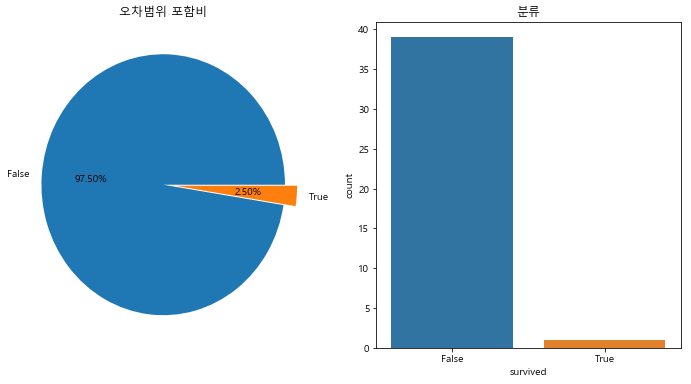

In [43]:
f,ax=plt.subplots(1, 2,figsize=(12,6))

total['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('오차범위 포함비')
ax[0].set_ylabel('')

sns.countplot('survived',data=total, ax=ax[1])
ax[1].set_title('분류')
plt.savefig('result_rate.png')
plt.show()

In [44]:
total.corr()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
번호,1.000000,0.098451,NaN,-0.517768,0.338302,0.379932,-0.021673,-0.221012,-0.221012
1회제공량 (g),0.098451,1.000000,NaN,0.294875,0.277772,-0.451895,-0.070370,-0.154730,-0.154730
열량 (kcal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
탄수화물 (g),-0.517768,0.294875,NaN,1.000000,-0.366575,-0.882241,-0.066453,-0.066809,-0.066809
단백질 (g),0.338302,0.277772,NaN,-0.366575,1.000000,-0.107739,-0.101465,0.037069,0.037069
지방 (g),0.379932,-0.451895,NaN,-0.882241,-0.107739,1.000000,0.203453,0.047773,0.047773
Error,-0.021673,-0.070370,NaN,-0.066453,-0.101465,0.203453,1.000000,-0.055718,-0.055718
survived,-0.221012,-0.154730,NaN,-0.066809,0.037069,0.047773,-0.055718,1.000000,1.000000
b_servived,-0.221012,-0.154730,NaN,-0.066809,0.037069,0.047773,-0.055718,1.000000,1.000000


In [45]:
total_low.corr()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
번호,1.000000,0.098451,NaN,-0.517768,0.338302,0.379932,-0.021673,0.095270,0.095270
1회제공량 (g),0.098451,1.000000,NaN,0.294875,0.277772,-0.451895,-0.070370,0.376061,0.376061
열량 (kcal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
탄수화물 (g),-0.517768,0.294875,NaN,1.000000,-0.366575,-0.882241,-0.066453,0.034610,0.034610
단백질 (g),0.338302,0.277772,NaN,-0.366575,1.000000,-0.107739,-0.101465,0.215268,0.215268
지방 (g),0.379932,-0.451895,NaN,-0.882241,-0.107739,1.000000,0.203453,-0.144542,-0.144542
Error,-0.021673,-0.070370,NaN,-0.066453,-0.101465,0.203453,1.000000,-0.041005,-0.041005
survived,0.095270,0.376061,NaN,0.034610,0.215268,-0.144542,-0.041005,1.000000,1.000000
b_servived,0.095270,0.376061,NaN,0.034610,0.215268,-0.144542,-0.041005,1.000000,1.000000


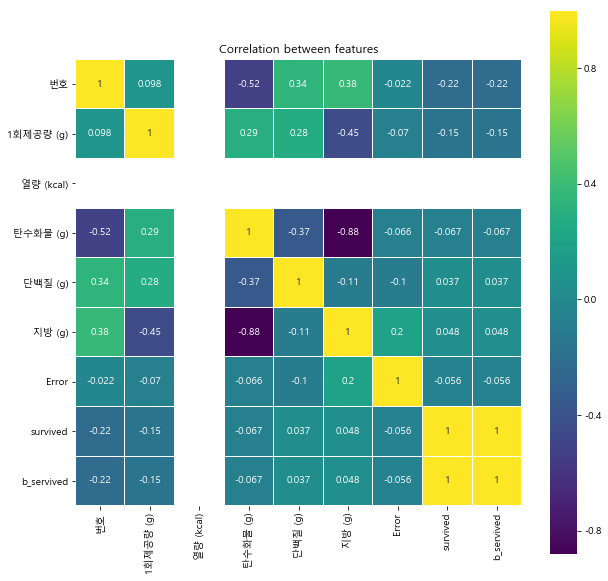

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(total.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.savefig('heatmap.png')
plt.show()

In [50]:
include = []
exclude = []
for i, d in enumerate(tmp_rate):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [48]:
include = []
exclude = []
for i, d in enumerate(tmp_rate_low):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [51]:
milk_normal_02_include = total.loc[include]
milk_normal_02_exclude = total.loc[exclude]

In [52]:
milk_normal_02_include.to_excel('milk_normal_02_include.xlsx')
milk_normal_02_exclude.to_excel('milk_normal_02_exclude.xlsx')

In [53]:
milk_normal_02_include

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
4,4146,우유 및 유제품,"분유, 전지",24.319066,125,9.501459,6.191634,6.643969,-2.431907,True,1


In [54]:
milk_normal_02_exclude

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,4138,우유 및 유제품,모유,192.307692,125,13.846154,2.115385,6.730769,-0.576923,False,0
1,4140,우유 및 유제품,"분유, 1단계",23.854962,125,13.568702,2.960401,6.142653,-3.599714,False,0
2,4142,우유 및 유제품,"분유, 2단계",23.946360,125,13.632663,3.024425,6.077586,-3.673372,False,0
3,4144,우유 및 유제품,"분유, 3단계",25.458248,125,14.266802,4.304990,5.257128,-3.398676,False,0
5,4148,우유 및 유제품,"분유, 탈지",34.340659,125,18.255495,11.634615,0.333104,-2.441621,False,0
6,4150,우유 및 유제품,산양유,201.612903,125,8.125000,6.370968,7.298387,-1.330645,False,0
7,4152,우유 및 유제품,샤베트,98.425197,125,28.248031,0.885827,0.984252,0.393701,False,0
8,4154,우유 및 유제품,아이스밀크,74.850299,125,17.889222,2.544910,4.790419,-0.149701,False,0
9,4156,우유 및 유제품,아이스크림(유지방 12%),58.962264,125,13.207547,2.063679,7.075472,-0.235849,False,0
10,4158,우유 및 유제품,"아이스크림, 딸기맛",65.104167,125,17.968750,2.083333,5.468750,4.427083,False,0


In [55]:
milk_normal  = milk_normal_02_include[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
milk_normal.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
4,4146,9.501459,6.191634,6.643969


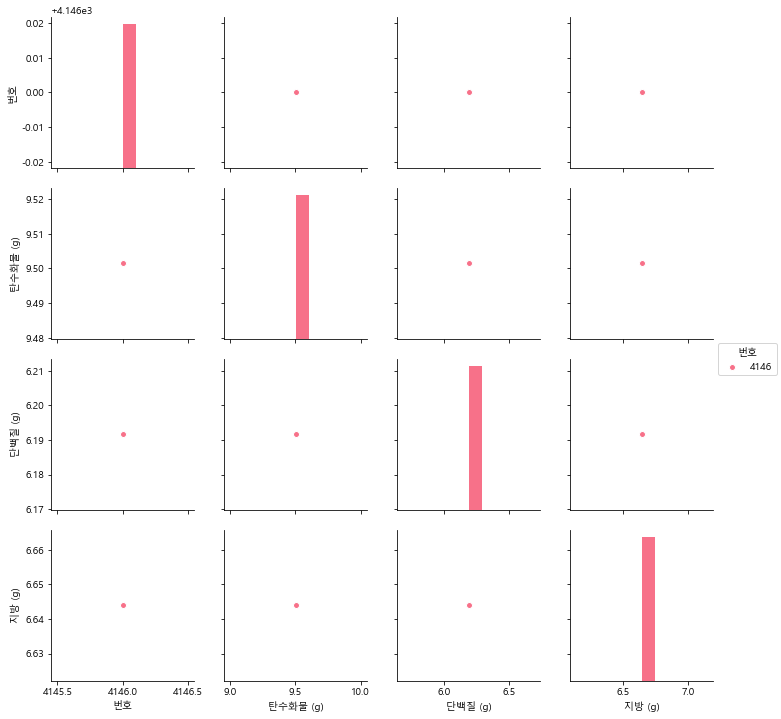

In [56]:
g = sns.pairplot(milk_normal, hue='번호',palette="husl")

In [58]:
milk  = total[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
milk.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
0,4138,13.846154,2.115385,6.730769
1,4140,13.568702,2.960401,6.142653
2,4142,13.632663,3.024425,6.077586
3,4144,14.266802,4.304990,5.257128
4,4146,9.501459,6.191634,6.643969


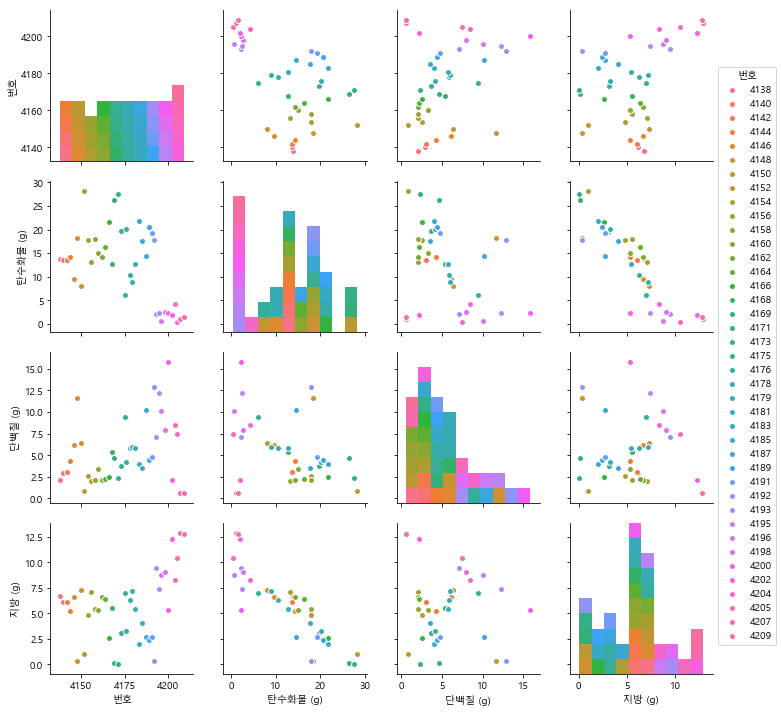

In [59]:
g = sns.pairplot(milk, hue='번호',palette="husl")

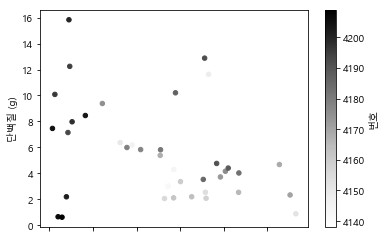

In [63]:
milk.plot.scatter(x='탄수화물 (g)', y='단백질 (g)', c='번호')

In [ ]:
milk_normal_01_include['식품군'].value_counts()

In [ ]:
milk_normal_01_exclude['식품군'].value_counts()

In [ ]:
milkkk  = total[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)', 'b_servived']]
milkkk.head()

In [ ]:
sns_plot = sns.pairplot(milkkk, hue='b_servived',palette="husl")

In [ ]:
sns_plot.savefig("milk_output.png")